# Model Problem

### Shallow Water Problem:

&emsp;&emsp; 
$h_t + (hv)_x = 0                           \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:(1)  \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:$ (Conservation of Volume)   

&emsp;&emsp; 
$v_t + vv_x + gh_x = 0      \:\:\:\:\:\:\:\:\:(2) \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:$ (Force balance)

where <br><br>
&emsp;&emsp; 
h(x,t) = height of the column of water at (x,t) <br>
&emsp;&emsp; 
v(x,t) = velocity field at (x,t)

**Domain: <br>**
&emsp;&emsp; 
$\Omega(x,t) = [0, L] * [0, \infty)$

**Boundary Conditions:<br>**
&emsp;&emsp; 
$v(0) = v(L) = 0$

**Initial Conditions:<br>**

&emsp;&emsp; 
$ \mathring{h} = h(x,0) =  H + \epsilon e^{-(x-L/2)^2/w^2}     $    <br>
&emsp;&emsp; 
$ \mathring{v} = v(x,0) =  0     $


## Analysis

Firstly, note in the system of equations given, not all equatuions represent the conservation laws. <br>

The eq. (1) clearly represents the conservation of $h(x,t)$ and it's flux is also easily seen to be $ flux(h) = hv = h * velocity$.<br>
The eq. (2), can be proven to be conservation law of a quantity called **discharge**, $m=hv$, see [Appendix B] 

## Initialize Notebook / Python

In [40]:
%%bash
pip install --no-cache-dir --upgrade pip
pip install --no-cache-dir -r requirements.txt

In [41]:
%matplotlib inline
import numpy as np                                
import math

import scipy.sparse as sparse
from scipy.sparse import csc_matrix, linalg
from scipy.sparse import spdiags, eye

import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

## HELPER FUNCTIONS

In [50]:
def h(x, H, epsilon, L, w):
    return H + epsilon * np.exp(-((x - L/2)**2) / w**2)      # Note: ** is exponentiation in Python

In [51]:
def plot(x, y, xlabel="x", ylabel="y", title=""):
    plt.figure(figsize=(8, 4))
    # Axes Lines
    plt.axhline(0, color='green', lw=1)
    plt.axvline(0, color='red', lw=1)
    # Labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    #Plot
    plt.plot(x, y)
    plt.show()

## Solver

In [ ]:
########################
# Parameters for the PDE
########################
L = 10      # Length of the channel
H = 1        # Height of water column
g = 9.81    
w = 0.4     # Width of the channel
eps = 1.2

########################
# Parameters for the Solver
########################

#------------------------------
# Domain Ω(x,t)=[0,1]×[0,inf)
#------------------------------
n = 1000    # Number of grid points
x = np.linspace(0, L, n)

# Δ𝑡, Δ𝑥
dx = x[1] - x[0]
dt = 0.1

#------------------------------
# CFL = c * Δ𝑡/(Δx)
#------------------------------
cfl = dt/(dx);

In [57]:
y = h(x, H, eps, L, w)

## Plot Results

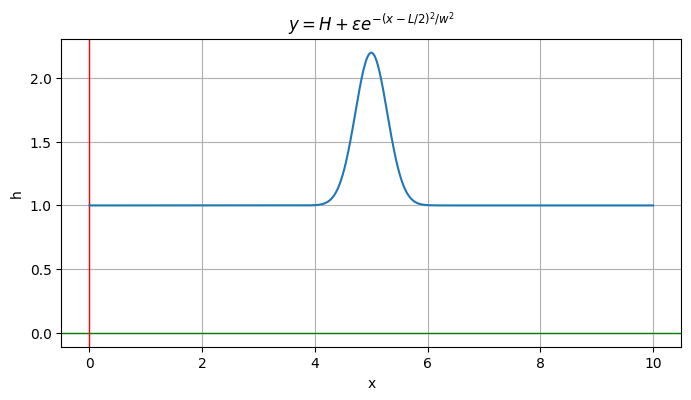

In [59]:
plot(   x,  y,
    xlabel="x",
    ylabel="h",
    title=r"$ y = H + \epsilon e^{-(x-L/2)^2/w^2} $"
)

# Appendix 

## Appendix A

### Integral Form of Conservation Law: 


Total amount of some continous quantity q(x,t) in a control volume $[x_1, x_2] \in \Omega$: <br> 

&emsp;&emsp; 
**Total q** = $\int_{\Omega}  q  \: d\Omega$ = $\int_{x_1}^{x_2}  q(x,t) \:  dx$

&emsp;&emsp; **Flux of q** = $q*velocity(x,t)$

Most basic form of conservation Law: 
<br><br>
&emsp;&emsp; 
( **Rate of Change of q**) = ( **FLUX of q** across the **boundary**)

<br><br>
&emsp;&emsp; 
$\frac {\partial q}{\partial t} $ = ( **FLUX of q** across the **boundary**)


### Additional Considerations for Fluids. 
When finding conservation laws for Fluids, Pressure and Viscocity also plays a  key role in the Flux of quantities. 

Pressure itself changes with the height of liquid.


### Setting up q(x,t)?

#### Steps:
1.  The very first thing to do is set up the function $q(x,t)$ and it's initial data: $\mathring{q} = q(x,0)$
2.  Plot it.

Now you realize that 

## Appendix B

### Derivation of Conservation Law form of Eq (2) 

## Rough

$$ 
\mathbb{ABCDEabcde1234} 
$$

```math
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
```

### References

1. Numerical Solutions of the Euler Eqations for Steady Flow Problems <br>
by Albrecht Eberle, Arthur Rizi, Ernst Heinrich Hirschel 

2. Statisitical Thermodynamics and Stochastic Kinetics - An introduction for Engineers <br>
by Yiannis N. Kaznessis

3. Essentials of Fluid Mechanics - Fundamentals and Applications <br>
by John M. Cimbala, Yunus A. Çengel
